# Purpose

#### Getting movie information from their Wikipedia page

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import pprint
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']
import requests
from bs4 import BeautifulSoup
import dill

## Capture data from Wikipedia's pages from movies 2000-2016

In [2]:
#years=range(2000,2005) ######################## Do not do all years to save memory
#years=range(2005,2010)
years=range(2010,2017)
url = "https://en.wikipedia.org/wiki/List_of_American_films_of_"
responses = [requests.get(url+str(year)) for year in years ]
print responses[0].url
print responses[0].text[:1000] + "..."
print len(responses)

https://en.wikipedia.org/wiki/List_of_American_films_of_2010
<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>List of American films of 2010 - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_American_films_of_2010","wgTitle":"List of American films of 2010","wgCurRevisionId":773077878,"wgRevisionId":773077878,"wgArticleId":25636852,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Incomplete film lists","2010 in American cinema","Lists of 2010 films by country or language","Lists of American films by year"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","w

In [3]:
soups = [BeautifulSoup(response.text) for response in responses]
print soups[0].head()

[<meta charset="utf-8"/>, <title>List of American films of 2010 - Wikipedia</title>, <script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>, <script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_American_films_of_2010","wgTitle":"List of American films of 2010","wgCurRevisionId":773077878,"wgRevisionId":773077878,"wgArticleId":25636852,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Incomplete film lists","2010 in American cinema","Lists of 2010 films by country or language","Lists of American films by year"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","Feb

## Capture table data from each year

In [4]:
tables = [ soup.select('table.wikitable') for soup in soups]

In [5]:
len(tables)

7

In [6]:
vintages = [[t.select('td') for t in table ]for table in tables]

In [7]:
wikis={'2000':[] , '2001':[], '2002':[], '2003':[], '2004':[], '2005':[], '2006':[],
      '2007':[] , '2008':[], '2009':[],
    '2010':[] , '2011':[], '2012':[], '2013':[], '2014':[], '2015':[], '2016':[]}
for year,vintage in zip(years,vintages):
    for releases in vintage:
        for release in releases:
            try:
                links = release.select('a')
                for link in links:
                    wikis[str(year)].append(link['href'])
            except IndexError:
                continue


In [9]:
with open('wikis.dill', 'w') as filename:
    dill.dump(wikis,filename)

In [2]:
with open('wikis.dill') as f:
    wikis = dill.load(f)

In [8]:
url = 'https://en.wikipedia.org'
responses = []
for year in years:   
    filtered_wikis = wikis[str(year)]

    for wiki in filtered_wikis:
        try:
            response = requests.get(url+wiki)
            responses.append(response)
        except requests.exceptions.RequestException:
            continue
        
print responses[0].url
print responses[0].text[:1000] + "..."
print len(responses)

https://en.wikipedia.org/wiki/127_Hours
<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>127 Hours - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"127_Hours","wgTitle":"127 Hours","wgCurRevisionId":770330239,"wgRevisionId":770330239,"wgArticleId":25244870,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from December 2013","All articles with unsourced statements","Articles with unsourced statements from July 2015","2010 films","English-language films","2010s biographical films","2010s drama films","2010s independent films","American films","American biographical films","American dra

In [36]:
added_responses = requests.get('https://en.wikipedia.org/wiki/La_La_Land_(film)')
filtered_responses = [added_responses]
print responses.url
print responses.text

https://en.wikipedia.org/wiki/La_La_Land_(film)
<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>La La Land (film) - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"La_La_Land_(film)","wgTitle":"La La Land (film)","wgCurRevisionId":773049755,"wgRevisionId":773049755,"wgArticleId":47204682,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use mdy dates from January 2017","Film articles using image size parameter","Articles containing potentially dated statements from March 2017","All articles containing potentially dated statements","2016 films","English-language films","2010s comedy-drama films","20

In [37]:
#filtered_responses = [response for response in responses if 'vevent' in response.text]

In [38]:
len(filtered_responses)

1

In [10]:
### Save
with open('filtered_responses.dill', 'w') as filename:
    dill.dump(filtered_responses,filename)

In [3]:
### Restore
with open('filtered_responses.dill') as f:
    filtered_responses = dill.load(f)

In [4]:
len(filtered_responses)

1836

In [39]:
#selected_responses = filtered_responses[:1000]
selected_responses = filtered_responses[:]
#selected_responses = [added_responses]

In [40]:
soups = [BeautifulSoup(response.text) for response in selected_responses]
print soups[0].head()

[<meta charset="utf-8"/>, <title>La La Land (film) - Wikipedia</title>, <script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>, <script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"La_La_Land_(film)","wgTitle":"La La Land (film)","wgCurRevisionId":773049755,"wgRevisionId":773049755,"wgArticleId":47204682,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use mdy dates from January 2017","Film articles using image size parameter","Articles containing potentially dated statements from March 2017","All articles containing potentially dated statements","2016 films","English-language films","2010s comedy-drama films","2010s dance films","2010s musical films","2010s musical comedy films","2010s romantic comedy films","2010s romantic 

In [41]:
print len(soups)

1


In [42]:
boxes = [ soup.select('table.infobox.vevent') for soup in soups ]

In [9]:
### Restore
with open('movies.dill') as filename:
    movies = dill.load(filename)

In [21]:
##movies = []


In [43]:

for box,response in zip(boxes,selected_responses):
    try:
        movie={}
        movie['title'] = box[0].select('th.summary')[0].text
        movie['site'] = response.url
        keys = box[0].select('th')[1:] 
        values = box[0].select('td')[1:]
        for k,v in zip(keys,values): 
            movie[k.text]=v.text
        movies.append(movie)
    except IndexError:
        continue

In [44]:
len(movies)

4013

In [45]:
movies[-1]

{u'\nProduction\ncompanies\n': u'\n\n\n\nSummit Entertainment[1]\nBlack Label Media\nTIK Films[2][3]\nImpostor Pictures\nGilbert Films\nMarc Platt Productions\n\n\n\n',
 u'\nRelease date\n': u'\n\n\nAugust\xa031,\xa02016\xa0(2016-08-31) (Venice Film Festival)\nDecember\xa09,\xa02016\xa0(2016-12-09) (United States)\n\n\n\n\n\n',
 u'\nRunning time\n': u'128 minutes[4]',
 u'Box office': u'$432.7 million[6]',
 u'Budget': u'$30 million[5]',
 u'Cinematography': u'Linus Sandgren',
 u'Country': u'United States',
 u'Directed by': u'Damien Chazelle',
 u'Distributed by': u'Summit Entertainment',
 u'Edited by': u'Tom Cross',
 u'Language': u'English',
 u'Music by': u'Justin Hurwitz',
 u'Produced by': u'\n\n\nFred Berger\nJordan Horowitz\nGary Gilbert\nMarc Platt\n\n\n',
 u'Starring': u'\n\n\nRyan Gosling\nEmma Stone\nJohn Legend\nRosemarie DeWitt\n\n\n',
 u'Written by': u'Damien Chazelle',
 'site': u'https://en.wikipedia.org/wiki/La_La_Land_(film)',
 'title': u'La La Land'}

In [46]:
movies_filtered = [movie for movie in movies if u'Box office' in movie ]

In [3]:
len(movies_filtered )

3634

In [48]:
## Save
with open('movies.dill', 'w') as filename:
    dill.dump(movies_filtered,filename)

In [2]:
### Restore
with open('movies.dill') as filename:
    movies_filtered = dill.load(filename)

## Create a pandas dataframe with movie data

In [4]:
import pandas as pd
import numpy as np
import re

In [5]:
frames = []
for movie in movies_filtered:
    frame = pd.DataFrame(movie.values()).T
    frame.columns = movie.keys()
    frames.append(frame)

In [6]:
df =pd.concat(frames)

In [7]:
df.columns

Index([u'\nProduction\ncompanies\n',   u'\nProduction\ncompany\n',
                u'\nRelease date\n',          u'\nRunning time\n',
                        u'Based on',                u'Box office',
                          u'Budget',                 u'Cantonese',
                  u'Cinematography',                   u'Country',
                     u'Directed by',            u'Distributed by',
                       u'Edited by',                    u'Hangul',
                           u'Hanja',                   u'Hepburn',
                        u'Japanese',                  u'Language',
                       u'Literally',                  u'Mandarin',
               u'McCune–Reischauer',                  u'Music by',
                     u'Narrated by',            u'Original title',
                     u'Produced by',      u'Revised Romanization',
                   u'Screenplay by',                u'Simplified',
                        u'Starring',                  u'Story 

In [8]:
df.index= np.arange(len(df))

### Combine productions companies into studio

In [9]:
df['studio']=df[u'\nProduction\ncompanies\n']

In [10]:
df.loc[df['studio'].isnull()==True,'studio']=df[u'\nProduction\ncompany\n']

### Generate csv file to export

In [53]:
df.to_csv('movies2000_2016.csv', encoding='utf-8')

### Convert Box Office to Float

In [12]:
revenues = []
for index, row in df.iterrows():
    if type(row[u'Box office'])==unicode:
        value = row[u'Box office'].lower() 
    else:
        value = row[u'Box office']
    if 'million'in value:
        value = value.split('million')[0].strip()
        if u'\u2013'in value:
            value = value.split(u'\u2013')[0]
        if '$' in value:
            value = value.split('$')[1]
        try:
            value = float(value)*1000000
        except ValueError:
            #value = 0
            pass
    elif 'billion'in value:
        value = value.split('billion')[0].strip()
        if '$' in value:
            value = value.split('$')[1]
        try:
            value = float(value)*1000000000
        except ValueError:
            #value = 0
            pass

        
    else:

        if ',' in value:
            value = re.sub(r'\,', '', value, flags=re.IGNORECASE)
        if '[' in value:
            value = value.split('[')[0].strip()
        if '(' in value: 
            value = value.split('(')[0].strip()
        if 'approx' in value: 
            value = value.split('approx')[0].strip()
        if '$' in value:
            value = value.split('$')[1]  
        try:
            value = float(value)
        except ValueError:
            #value = 0
            pass

    revenues.append(value)
        

In [13]:
df['revenues']=revenues

In [14]:
actors_dict = {}
for index, row in df.iterrows():
    site = row[u'site']
    try:
        actors = row[u'Starring'].split('\n')
        for actor in actors:
            try:
                if site not in actors_dict:
                    actors_dict[site] = []
                actors_dict[site].append(actors)
            except ValueError:

                continue
    except AttributeError:
        if site not in actors_dict:
            actors_dict[site] = []
        actors_dict[site].append('')
        continue


In [15]:
directors_dict = {}
for index, row in df.iterrows():
    site = row[u'site']
    try:
        directors = row[u'Directed by'].split('\n')
        for director in directors:
            try:
                if site not in directors_dict:
                    directors_dict[site] = []
                directors_dict[site].append(directors)
            except ValueError:

                continue
    except AttributeError:
        if site not in directors_dict:
            directors_dict[site] = []
        directors_dict[site].append('')
        continue


In [16]:
df['stars_list']=df[u'site'].apply(lambda x : actors_dict[x] )

In [17]:
df['directors_list']=df[u'site'].apply(lambda x : directors_dict[x])

In [18]:
df['directors_list'][:25]

0                       [[Kevin Lima]]
1                    [[Stephen Herek]]
2                     [[Betty Thomas]]
3                          [[DJ Pooh]]
4               [[Roger Spottiswoode]]
5                      [[Des McAnuff]]
6               [[Billy Bob Thornton]]
7                    [[Cameron Crowe]]
8                      [[Mary Harron]]
9                    [[Steve Buscemi]]
10                [[Christian Duguay]]
11                       [[Joan Chen]]
12                   [[Antoine Fuqua]]
13                       [[Spike Lee]]
14                 [[Roger Christian]]
15                     [[Danny Boyle]]
16                     [[Sally Field]]
17                    [[Harold Ramis]]
18                   [[Stanley Donen]]
19                 [[Julian Schnabel]]
20               [[Christopher Guest]]
21    [[Raja Gosnell], [Raja Gosnell]]
22                   [[Chuck Russell]]
23                     [[Ben Younger]]
24                   [[Joe Berlinger]]
Name: directors_list, dty

In [19]:
df

,Production companies,Production company,Release date,Running time,Based on,Box office,Budget,Cantonese,Cinematography,Country,...,Starring,Story by,Traditional,Written by,site,title,studio,revenues,stars_list,directors_list
0,NaN,\nWalt Disney Pictures\n,"\n\n\nNovember 22, 2000 (2000-11-22)\n\n\n\n\n...",100 minutes,The Hundred and One Dalmatians\nby Dodie Smith,$183.6 million[1],$85 million,NaN,Adrian Biddle,United States,...,Glenn Close\nIoan Gruffudd\nAlice Evans\nTim M...,Kristen Buckley\nBrian Regan,NaN,NaN,https://en.wikipedia.org/wiki/102_Dalmatians,102 Dalmatians,\nWalt Disney Pictures\n,1.836e+08,"[[Glenn Close, Ioan Gruffudd, Alice Evans, Tim...",[[Kevin Lima]]
1,NaN,\nWalt Disney Pictures\nGreat Oaks Productions\n,"\n\n\nNovember 27, 1996 (1996-11-27)\n\n\n\n\n...",103 minutes,The Hundred and One Dalmatians\nby Dodie Smith,$320.6 million[2],$75 million[1],NaN,Adrian Biddle,United States,...,\n\n\nGlenn Close\nJeff Daniels\nJoely Richard...,NaN,NaN,NaN,https://en.wikipedia.org/wiki/101_Dalmatians_(...,101 Dalmatians,\nWalt Disney Pictures\nGreat Oaks Productions\n,3.206e+08,"[[, , , Glenn Close, Jeff Daniels, Joely Richa...",[[Stephen Herek]]
2,NaN,\n\n\n\nColumbia Pictures\nTall Tree Productio...,"\n\n\nApril 14, 2000 (2000-04-14)\n\n\n\n\n\n\n",104 minutes,NaN,$62.2 million[1],$43 million[1],NaN,Declan Quinn,United States,...,\n\n\nSandra Bullock\nViggo Mortensen\nDominic...,NaN,NaN,Susannah Grant,https://en.wikipedia.org/wiki/28_Days_(film),28 Days,\n\n\n\nColumbia Pictures\nTall Tree Productio...,6.22e+07,"[[, , , Sandra Bullock, Viggo Mortensen, Domin...",[[Betty Thomas]]
3,NaN,NaN,"\n\n\nMarch 1, 2000 (2000-03-01)\n\n\n\n\n\n\n",82 minutes,NaN,$9.8 million[1],$3.4 million[1],NaN,John Simmons,United States,...,\n\n\nBrian Hooks\nN'Bushe Wright\nFaizon Love...,NaN,NaN,DJ Pooh,https://en.wikipedia.org/wiki/3_Strikes_(film),3 Strikes,NaN,9.8e+06,"[[, , , Brian Hooks, N'Bushe Wright, Faizon Lo...",[[DJ Pooh]]
4,NaN,\nPhoenix Pictures\n,"\n\n\nOctober 28, 2000 (2000-10-28) (TIFF)[1]\...",124 minutes,NaN,$96.1 million[2][3],$82 million[2],NaN,Pierre Mignot,United States,...,\n\n\nArnold Schwarzenegger\nMichael Rapaport\...,NaN,NaN,Cormac Wibberley and Marianne Wibberley,https://en.wikipedia.org/wiki/The_6th_Day,The 6th Day,\nPhoenix Pictures\n,9.61e+07,"[[, , , Arnold Schwarzenegger, Michael Rapapor...",[[Roger Spottiswoode]]
5,\n\n\n\nTriBeCa Productions\nJay Ward Producti...,NaN,"\n\n\nJune 30, 2000 (2000-06-30) (United State...",92 minutes[1],The Rocky and Bullwinkle Show\nby Jay Ward,$35.1 million[2],$76 million[2],NaN,Thomas E. Ackerman,United States,...,\n\n\nJune Foray\nKeith Scott\nPiper Perabo\nR...,NaN,NaN,Kenneth Lonergan,https://en.wikipedia.org/wiki/The_Adventures_o...,The Adventures of\nRocky and Bullwinkle,\n\n\n\nTriBeCa Productions\nJay Ward Producti...,3.51e+07,"[[, , , June Foray, Keith Scott, Piper Perabo,...",[[Des McAnuff]]
6,NaN,\nMiramax Films\n,"\n\n\nDecember 25, 2000 (2000-12-25)\n\n\n\n\n...",117 minutes[1],All the Pretty Horses\nby Cormac McCarthy,$18.1 million[2],$57 million[2],NaN,Barry Markowitz,United States,...,\n\n\nMatt Damon\nPenélope Cruz\nHenry Thomas\...,NaN,NaN,NaN,https://en.wikipedia.org/wiki/All_the_Pretty_H...,All the Pretty Horses,\nMiramax Films\n,1.81e+07,"[[, , , Matt Damon, Penélope Cruz, Henry Thoma...",[[Billy Bob Thornton]]
7,NaN,\nVinyl Films\n,"September 13, 2000",122 minutes,NaN,$47.4 million[1],$60 million[1],NaN,John Toll,United States,...,Billy Crudup\nFrances McDormand\nKate Hudson\n...,NaN,NaN,Cameron Crowe,https://en.wikipedia.org/wiki/Almost_Famous,Almost Famous,\nVinyl Films\n,4.74e+07,"[[Billy Crudup, Frances McDormand, Kate Hudson...",[[Cameron Crowe]]
8,\n\n\n\nEdward R. Pressman Productions\nMuse P...,NaN,"\n\n\nJanuary 21, 2000 (2000-01-21) (Sundance)...",101 minutes[1],American Psycho\nby Bret Easton Ellis,$34.3 million[2],$7 million[2],NaN,Andrzej Sekuła,United States,...,\n\n\nChristian Bale\nWillem Dafoe\nJared Leto...,NaN,NaN,NaN,https://en.wi

In [20]:
df['stars_list'][:10]

0    [[Glenn Close, Ioan Gruffudd, Alice Evans, Tim...
1    [[, , , Glenn Close, Jeff Daniels, Joely Richa...
2    [[, , , Sandra Bullock, Viggo Mortensen, Domin...
3    [[, , , Brian Hooks, N'Bushe Wright, Faizon Lo...
4    [[, , , Arnold Schwarzenegger, Michael Rapapor...
5    [[, , , June Foray, Keith Scott, Piper Perabo,...
6    [[, , , Matt Damon, Penélope Cruz, Henry Thoma...
7    [[Billy Crudup, Frances McDormand, Kate Hudson...
8    [[, , , Christian Bale, Willem Dafoe, Jared Le...
9    [[Willem Dafoe, Edward Furlong, Danny Trejo, J...
Name: stars_list, dtype: object

In [21]:
df.loc[df['revenues'].notnull()==True,'check_rev'] = df['revenues'].apply(lambda x: type(x) )

In [22]:
df[df['check_rev'] == unicode]

,Production companies,Production company,Release date,Running time,Based on,Box office,Budget,Cantonese,Cinematography,Country,...,Story by,Traditional,Written by,site,title,studio,revenues,stars_list,directors_list,check_rev
88,NaN,NaN,"\n\n\nJune 28, 1961 (1961-06-28)\n\n\n\n\n\n\n",106 minutes,NaN,"926,423 admissions (France)[2]",$3.1 million[1],NaN,W. Wallace Kelley,United States,...,NaN,NaN,Jerry Lewis\nBill Richmond,https://en.wikipedia.org/wiki/The_Ladies_Man,The Ladies Man,NaN,926423 admissions,"[[Jerry Lewis, Lillian Briggs, Helen Traubel, ...",[[Jerry Lewis]],<type 'unicode'>
148,NaN,\nFilmFour\nKanzaman S.A.\nRecorded Picture Co...,\n\n\n13 September 2000 (2000-09-13) (TIFF)\n1...,88 minutes,NaN,"£31,765,934",£4.2 million,NaN,Ivan Bird,United Kingdom\nSpain,...,NaN,NaN,Louis Mellis\nDavid Scinto,https://en.wikipedia.org/wiki/Sexy_Beast,Sexy Beast,\nFilmFour\nKanzaman S.A.\nRecorded Picture Co...,£31765934,"[[Ray Winstone, Ben Kingsley, Ian McShane, Ama...",[[Jonathan Glazer]],<type 'unicode'>
370,NaN,NaN,The Samuel Goldwyn Company,"\n\n\nAugust 3, 1994 (1994-08-03)\n\n\n\n\n\n\n",NaN,Mandarin,NaN,NaN,Mader,123 minutes,...,NaN,\n‹ The template below (Infobox name module) i...,Hsu Li Kong\nHsu Kong,https://en.wikipedia.org/wiki/Eat_Drink_Man_Woman,Eat Drink Man Woman,NaN,mandarin,"[[Ang Lee, James Schamus, Hui-Ling Wang], [Ang...",[[yǐn shí nán nǚ]],<type 'unicode'>
461,NaN,NaN,"\n\n\nFebruary 15, 2002 (2002-02-15)\n\n\n\n\n...",125 minutes,John Katzenbach,$32[2]–33.1 million[1],$70 million[1],NaN,Alar Kivilo,United States,...,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Hart%27s_War,Hart's War,NaN,32[2],"[[, , , Bruce Willis, Colin Farrell, Terrence ...",[[Gregory Hoblit]],<type 'unicode'>
864,NaN,\nDavis Entertainment\n,"December 17, 2004 (2004-12-17)",113 minutes,The Flight of the Phoenix\n1964 novel\nby Elle...,"$34,586,268 <[1]",$45 million [1],NaN,Brendan Galvin,United States,...,NaN,NaN,Luke Heller\nScott Frank\nEdward Burns (screen...,https://en.wikipedia.org/wiki/Flight_of_the_Ph...,Flight of the Phoenix,\nDavis Entertainment\n,34586268 <,"[[Dennis Quaid, Giovanni Ribisi, Tyrese Gibson...",[[John Moore]],<type 'unicode'>
874,NaN,Nobuyuki Takahashi[1],Lions Gate Films (US)[1],\n\n\n18 October 2002 (2002-10-18) (Screamfest...,NaN,Japanese,NaN,NaN,Shiro Sato[1],92 minutes[2],...,NaN,NaN,Taka Ichise[1],https://en.wikipedia.org/wiki/Ju-on:_The_Grudge,Ju-on: The Grudge,Nobuyuki Takahashi[1],japanese,[[Takashi Shimizu[1]]],[[Juon]],<type 'unicode'>
879,NaN,NaN,"\n\n\nJanuary 24, 2005 (2005-01-24) (Sundance ...",98 minutes,NaN,"$1,3 million[1]",NaN,NaN,Jim Denault,United States,...,Amy Fox,NaN,NaN,https://en.wikipedia.org/wiki/Heights_(film),Heights,NaN,"1,3","[[Glenn Close, Elizabeth Banks, James Marsden,...",[[Chris Terrio]],<type 'unicode'>
987,NaN,"\nWarner Bros. Pictures, Helena Productions, L...","\n\n\nMay 14, 2004 (2004-05-14)\n\n\n\n\n\n\n",162 minutes\n196 minutes (Director's cut),Iliad\nby Homer,$497.409.852[1],$175.000.000,NaN,Roger Pratt,Malta\nUnited Kingdom\nUnited States,...,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Troy_(film),Troy,"\nWarner Bros. Pictures, Helena Productions, L...",497.409.852,"[[Brad Pitt, Eric Bana, Orlando Bloom], [Brad ...",[[Wolfgang Petersen]],<type 'unicode'>
1192,NaN,\nVillage Roadshow Pictures\nSection Eight Pro...,"\n\n\nDecember 25, 2005 (2005-12-25)\n\n\n\n\n...",96 minutes,NaN,"\n$109.9(net gross)\n$88.9 million[1]\n$21,036...",$70 million,NaN,Peter Deming,United States,...,NaN,NaN,Ted Griffin,https://en.wikipedia.org/wiki/Rumor_Has_It...,Rumor Has It,\nVillage Roadshow Pictures\nSection Eight Pro...,109.9(net gross)\n,"[[, , , Jennifer Aniston, Kevin Costner, Shirl...",[[Rob Reiner]],<type 'unicode'>
1216,NaN,NaN,"\n\n\nDecember 30, 2005 (2005-12-30) (Cannes F...",87 minutes,NaN,CN¥3.650 million (China),CN¥156 million (US$20 million),NaN,NaN,China,...,NaN,NaN,Jim Cox,https://en.wikipedia.org/wiki/Thru_the_Moebius...,Thru the Moebius Strip,NaN,cn¥3.650,[],"[[Glenn Chaika, 

In [23]:
df_rev = df[df['check_rev']==float]
print 'Size of industry (based on sample): %d billion dollars' % (df_rev['revenues'].sum()/1000000000)

Size of industry (based on sample): 464 billion dollars


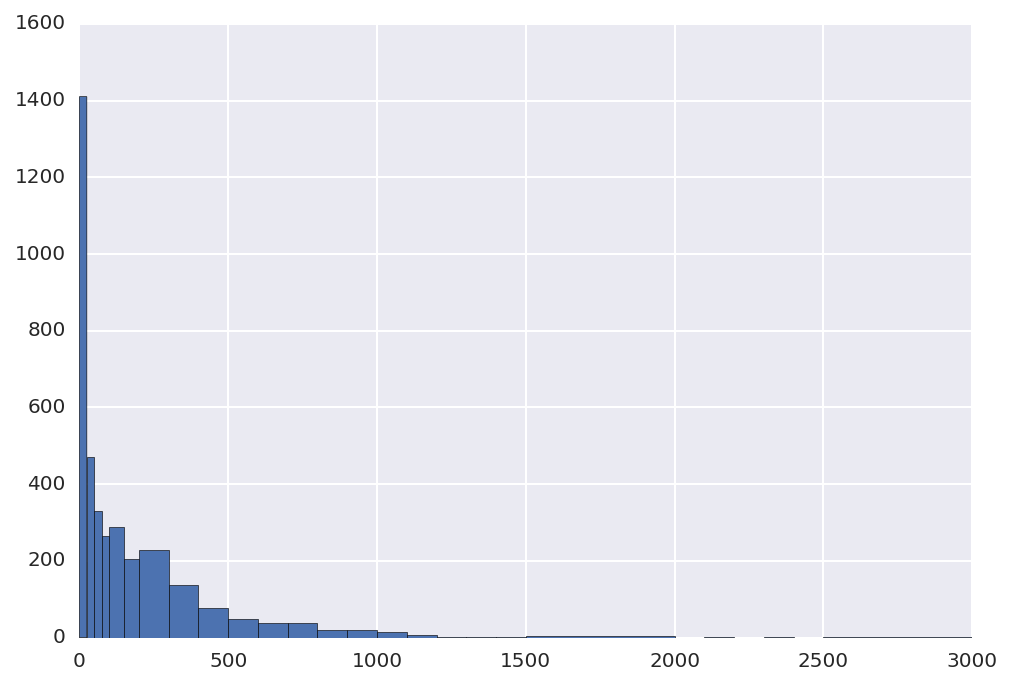

In [24]:
rev = (df_rev['revenues']/1000000).hist(bins=[0, 25,50,75, 100, 150,200, 300, 400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,2000,2100,2200,2300,2400,2500,3000])
rev_fig = rev.get_figure()
rev_fig.savefig('revenue_histogram.png')

### Convert Budget to Float

In [25]:
costs = []
for index, row in df.iterrows():
    if type(row[u'Budget'])==unicode:
        value = row[u'Budget'].lower() 
        if 'million' in value:
            value = value.split('million')[0].strip()
            if '[' in value:
                value = value.split('[')[0].strip()
            if u'\u2013'in value:
                value = value.split(u'\u2013')[0].strip()
            if '-'in value:
                value = value.split('-')[0].strip()
            if '$' in value:
                value = value.split('$')[1]
            try:
                value = float(value)*1000000
            except ValueError:
                #value = 0
                pass
        
        elif 'm' in value:
            value = value.split('m')[0].strip()
            if '[' in value:
                value = value.split('[')[0].strip()
            if u'\u2013'in value:
                value = value.split(u'\u2013')[0].strip()
            if '-'in value:
                value = value.split('-')[0].strip()
            if '$' in value:
                value = value.split('$')[1]
            try:
                value = float(value)*1000000
            except ValueError:
                #value = 0
                pass
        
        else:
            if ',' in value:
                value = re.sub(r'\,', '', value, flags=re.IGNORECASE)
            if '[' in value:
                value = value.split('[')[0].strip()
            if '(' in value: 
                value = value.split('(')[0].strip()
            if 'approx' in value: 
                value = value.split('approx')[0].strip()
            if '$' in value:
                value = value.split('$')[1]  
            try:
                value = float(value)
            except ValueError:
                #value = 0
                pass
    else:
        value = row[u'Budget']


    costs.append(value)
        

In [26]:
df['costs']=costs

In [27]:
df.loc[df['costs'].notnull()==True,'check_costs'] = df['costs'].apply(lambda x: type(x) )

In [28]:
df[df['check_costs'] == unicode]

,Production companies,Production company,Release date,Running time,Based on,Box office,Budget,Cantonese,Cinematography,Country,...,Written by,site,title,studio,revenues,stars_list,directors_list,check_rev,costs,check_costs
118,NaN,NaN,"\n\n\nDecember 1, 2000 (2000-12-01)\n\n\n\n\n\n\n",88 min.,NaN,"$779,137 (USA) (sub-total)","$1,000,000 (estimated)",NaN,Jeffrey Jur,United States,...,Henry Bromell,https://en.wikipedia.org/wiki/Panic_(2000_film),Panic,NaN,779137,"[[William H. Macy, John Ritter, Neve Campbell,...",[[Henry Bromell]],<type 'float'>,"1,000,000 (esti",<type 'unicode'>
148,NaN,\nFilmFour\nKanzaman S.A.\nRecorded Picture Co...,\n\n\n13 September 2000 (2000-09-13) (TIFF)\n1...,88 minutes,NaN,"£31,765,934",£4.2 million,NaN,Ivan Bird,United Kingdom\nSpain,...,Louis Mellis\nDavid Scinto,https://en.wikipedia.org/wiki/Sexy_Beast,Sexy Beast,\nFilmFour\nKanzaman S.A.\nRecorded Picture Co...,£31765934,"[[Ray Winstone, Ben Kingsley, Ian McShane, Ama...",[[Jonathan Glazer]],<type 'unicode'>,£4.2,<type 'unicode'>
157,NaN,NaN,"\n\n\nJanuary 25, 2000 (2000-01-25)\n\n\n\n\n\n\n",109 minutes,NaN,"$3,050,934[2]","$1,800,000 (estimated)[1]",NaN,Enrique Chediak,United States,...,Maggie Greenwald,https://en.wikipedia.org/wiki/Songcatcher,Songcatcher,NaN,3.05093e+06,"[[Janet McTeer, Aidan Quinn, Michael Davis, Mi...",[[Maggie Greenwald]],<type 'float'>,"1,800,000 (esti",<type 'unicode'>
376,NaN,\nRedbus Film Distribution\n,\n\n\n19 December 1997 (1997-12-19)\n\n\n\n\n\n\n,117 minutes[1][2][3],NaN,"$370,720[5]",ESP 370 million,NaN,NaN,Spain\nFrance\nItaly[4],...,Alejandro Amenábar\nMateo Gil,https://en.wikipedia.org/wiki/Open_Your_Eyes_(...,Open Your Eyes,\nRedbus Film Distribution\n,370720,"[[, , , Eduardo Noriega, Penélope Cruz, Chete ...",[[Alejandro Amenábar]],<type 'float'>,esp 370,<type 'unicode'>
477,NaN,\nMorgan Creek\n,"\n\n\nJune 21, 2002 (2002-06-21)\n\n\n\n\n\n\n",91 min.,NaN,"$13,802,599","$15,600,000 (estimated)",NaN,Reynaldo Villalobos,United States,...,Bradley Allenstein,https://en.wikipedia.org/wiki/Juwanna_Mann,Juwanna Mann,\nMorgan Creek\n,1.38026e+07,"[[Miguel A. Núñez, Jr., Vivica A. Fox, Kevin P...",[[Jesse Vaughan]],<type 'float'>,"15,600,000 (esti",<type 'unicode'>
506,NaN,\n\n\n\nCecchi Gori Group\nMelampo Cinematogra...,\n\n\n11 October 2002 (2002-10-11) (Italy)\n25...,108 minutes,The Adventures of Pinocchio\nby Carlo Collodi,$41.3 million[1],€40 million,NaN,Dante Spinotti,\n\n\nItaly\nFrance\nGermany\nUnited States\n\n\n,...,\n\n\nRoberto Benigni\nVincenzo Cerami\n\n\n,https://en.wikipedia.org/wiki/Pinocchio_(2002_...,Pinocchio,\n\n\n\nCecchi Gori Group\nMelampo Cinematogra...,4.13e+07,"[[, , , Roberto Benigni, Nicoletta Braschi, Ca...",[[Roberto Benigni]],<type 'float'>,€40,<type 'unicode'>
548,NaN,NaN,"\n\n\nJanuary 18, 2002 (2002-01-18)\n\n\n\n\n\n\n",88 min.,NaN,"$2,106,838 (United States)[1]","$600,000 USD",NaN,David Daniel,NaN,...,"Abdul Malik Abbott\nErnest ""Tron"" Anderson",https://en.wikipedia.org/wiki/State_Property_(...,State Property,NaN,2.10684e+06,"[[Beanie Sigel, Jay-Z, Damon Dash, Memphis Ble...",[[Abdul Malik Abbott]],<type 'float'>,600000 usd,<type 'unicode'>
624,NaN,NaN,"\n\n\nSeptember 19, 2003 (2003-09-19)\n\n\n\n\...",98 minutes,NaN,"$2,294,823 (Foreign)[1][2]","$10,000,000 (estimated)",NaN,NaN,Canada\nUnited Kingdom,...,Brad Mirman,https://en.wikipedia.org/wiki/Crime_Spree,Crime Spree,NaN,2.29482e+06,"[[Gérard Depardieu, Harvey Keitel, Johnny Hall...",[[Brad Mirman]],<type 'float'>,"10,000,000 (esti",<type 'unicode'>
841,NaN,NaN,"\n\n\nAugust 31, 2000 (2000-08-31) (Argentina)...",114 minutes,NaN,"$12,413,888[2]",$1.300.000[1],NaN,Marcelo Camorino,Argentina,...,Fabián Bielinsky,https://en.wikipedia.org/wiki/Nine_Queens_(film),Nine Queens\nNueve Reinas,NaN,1.24139e+07,"[[Gastón Pauls, Ricardo Darín, Leticia Brédice...",[[Fabián Bielinsky]],<type 'float'>,1.300.000,<type 'unicode'>
928,NaN,\nIFC Productions\n,"\n\n\nJanuary 18, 2004 (2004-01-18) (Sundance)...",73 minutes,NaN,"$192,186","$150,

In [29]:
df_cost = df[df['check_costs']==float]
print 'Budget of movies included in sample: %d billion dollars' %  (df_cost['costs'].sum()/1000000000)

Budget of movies included in sample: 141 billion dollars


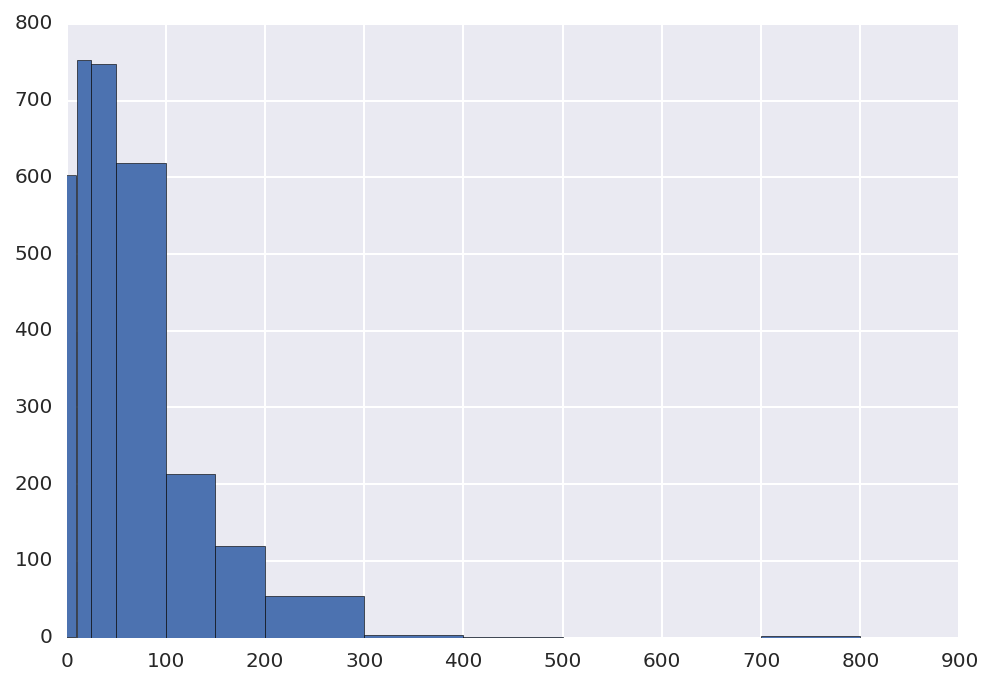

In [30]:
p_cost = (df_cost['costs']/1000000).hist(bins=[0,10,25, 50, 100, 150,200, 300, 400,500,600,700,800,900])
cost_fig = p_cost.get_figure()
cost_fig.savefig('cost_histogram.png')

In [31]:
df_set = df[df['check_rev']==float]
df_set = df_set[df_set['check_costs']==float]

In [32]:
df_list = df_set[['title','revenues', 'costs']]

In [33]:
df_set['costs'].sum()/1000000000

141.41602780232

In [34]:
df_list.index= df_list['title']
df_list = df_list[['revenues', 'costs']]

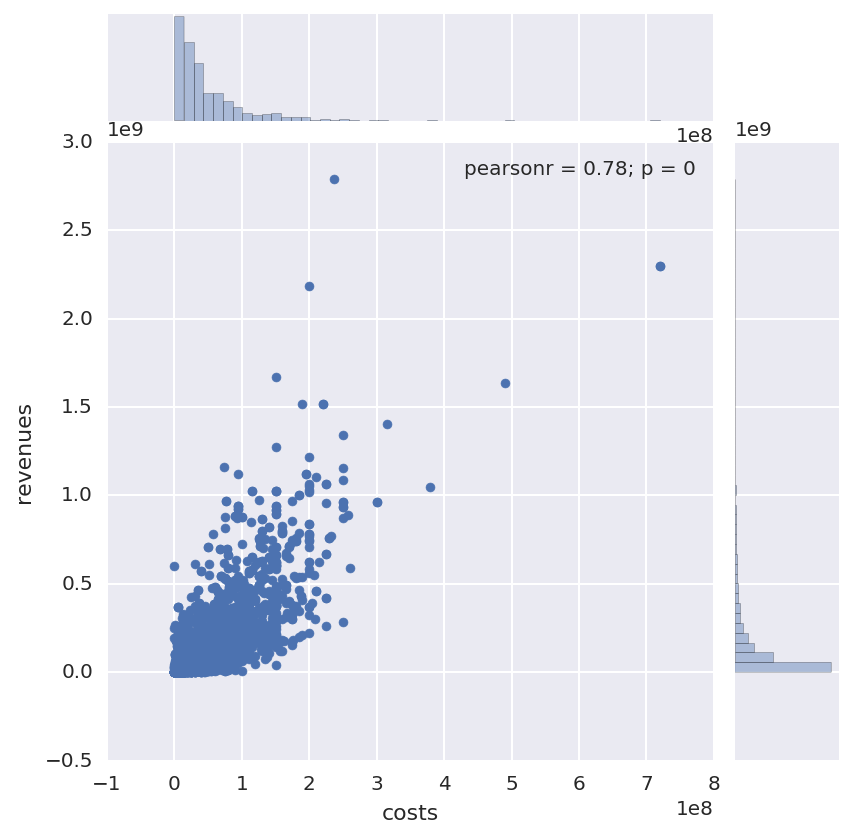

In [35]:
plot = sns.jointplot(x='costs', y='revenues', data=df_list)
plot.savefig("correlation.png")

### Convert Release date into datetime

In [36]:
date = df[u'\nRelease date\n' ][0]

In [37]:
from datetime import datetime
dates = []
premieres = []
for index, row in df.iterrows():
    raw_dates = row[u'\nRelease date\n']
    try:
        filtered_dates = re.findall("([0-9]{4}\-[0-9]{2}\-[0-9]{2})", raw_dates)
        movie_dates = [datetime.strptime(date, '%Y-%m-%d') for date in filtered_dates]
    except TypeError:
        pass
    dates.append(movie_dates)
    

In [38]:
df['release_dates'] = dates

In [39]:
dates

[[datetime.datetime(2000, 11, 22, 0, 0)],
 [datetime.datetime(1996, 11, 27, 0, 0)],
 [datetime.datetime(2000, 4, 14, 0, 0)],
 [datetime.datetime(2000, 3, 1, 0, 0)],
 [datetime.datetime(2000, 10, 28, 0, 0),
  datetime.datetime(2000, 11, 17, 0, 0)],
 [datetime.datetime(2000, 6, 30, 0, 0)],
 [datetime.datetime(2000, 12, 25, 0, 0)],
 [],
 [datetime.datetime(2000, 1, 21, 0, 0), datetime.datetime(2000, 4, 14, 0, 0)],
 [datetime.datetime(2000, 1, 24, 0, 0), datetime.datetime(2000, 10, 13, 0, 0)],
 [datetime.datetime(2000, 8, 25, 0, 0)],
 [datetime.datetime(2000, 8, 11, 0, 0)],
 [],
 [datetime.datetime(2000, 10, 6, 0, 0)],
 [datetime.datetime(2000, 5, 12, 0, 0)],
 [datetime.datetime(2000, 2, 11, 0, 0)],
 [datetime.datetime(2000, 9, 29, 0, 0)],
 [datetime.datetime(2000, 10, 20, 0, 0)],
 [datetime.datetime(1967, 12, 10, 0, 0)],
 [datetime.datetime(2000, 9, 3, 0, 0), datetime.datetime(2001, 1, 26, 0, 0)],
 [],
 [datetime.datetime(2000, 6, 2, 0, 0)],
 [datetime.datetime(2000, 8, 11, 0, 0)],
 [date

In [40]:
df['release_year']= df['release_dates'].apply(lambda x: x[-1].year if x else 'NA' )

In [41]:
df['release_month']= df['release_dates'].apply(lambda x: x[-1].month if x else 'NA' )

In [42]:
df['release_day']=df['release_dates'].apply(lambda x: str(x[-1].month)+'/'+str(x[-1].day) if x else 'NA' )

In [43]:
df[(df['check_rev']==float)&(df['release_year']>2009)].groupby('release_month')['revenues'].sum()/1000000000

release_month
1      5.769983
2      9.878830
3     17.362815
4     12.528405
5     38.967213
6     25.730122
7     26.676327
8     11.729853
9      6.821071
10     8.648849
11    18.532991
12    14.122034
NA    20.069048
Name: revenues, dtype: float64

In [44]:
df[(df['check_rev']==float)&(df['release_year']>2009)].groupby('release_day')['revenues'].sum()/1000000000

release_day
1/1       0.043000
1/10      0.249000
1/11      0.225428
1/13      0.192058
1/14      0.315234
1/15      0.480308
1/16      0.103100
1/17      0.481400
1/18      0.083520
1/19      0.000022
1/2       0.048900
1/20      0.295990
1/21      0.481050
1/22      0.469534
1/23      0.316732
1/25      0.081048
1/26      0.000540
1/27      0.160653
1/28      0.178336
1/29      0.864018
1/3       0.091390
1/30      0.071700
1/31      0.060776
1/4       0.047212
1/6       0.101800
1/7       0.172829
1/8       0.154406
10/1      0.253256
10/10     0.252300
10/11     0.234295
           ...    
8/8       1.437700
8/9       0.769842
9/1       0.067900
9/10      0.601297
9/11      0.003202
9/12      0.118661
9/13      0.162009
9/14      0.047368
9/16      0.167815
9/17      0.316026
9/18      0.340900
9/19      0.453500
9/2       0.080236
9/20      0.122787
9/21      0.184107
9/22      0.080500
9/23      0.768374
9/24      0.194779
9/25      0.012700
9/26      0.542810
9/27      0.346999


In [45]:
df[(df['check_rev']==float)].groupby('release_year')['revenues'].sum()/1000000 /df[(df['check_rev']==float)].groupby('release_year')['revenues'].count()

release_year
1933      2.800000
1936      1.000000
1939      2.270000
1940     76.400000
1942    267.400000
1943      4.517000
1946     23.700000
1948      2.750000
1950    263.600000
1951      1.850000
1953     55.575000
1954     36.800000
1957      1.850000
1959      8.100000
1960      2.916667
1963     36.737294
1965     23.000000
1967     83.500000
1968     20.335437
1971     10.500000
1972    202.900000
1973      0.851892
1974     29.002692
1975     12.000000
1976     60.900000
1977     47.300000
1978     55.866667
1979     37.783035
1980     21.250000
1981     43.656597
           ...    
1989    474.200000
1990     68.275000
1991    314.740000
1992    352.900000
1993     40.900000
1994    188.874789
1995    133.350000
1996    374.160000
1997    483.082077
1998    139.564308
1999    356.504732
2000     89.565117
2001    107.809539
2002    108.983063
2003    117.353245
2004    108.785212
2005    100.854504
2006     99.403361
2007    112.802616
2008    119.155447
2009    143.092245

In [46]:
df[(df['check_rev']==float)&(df['release_year']>2009)].groupby('release_month')['revenues'].count()

release_month
1     105
2      99
3     134
4     132
5     106
6     108
7     117
8     114
9     117
10    109
11     87
12     75
NA    124
Name: revenues, dtype: int64

In [47]:
df[(df['revenues']>1000000)&(df['release_year']>2009)].groupby('release_month')['revenues'].sum()/1000000000/df[(df['revenues']>1000000)&(df['release_year']>2009)].groupby('release_month')['revenues'].count()


TypeError: unsupported operand type(s) for +: 'float' and 'unicode'

In [50]:
df[df['release_year']==2016].count()

\nProduction\ncompanies\n     68
\nProduction\ncompany\n       67
\nRelease date\n             134
\nRunning time\n             134
Based on                      61
Box office                   135
Budget                       131
Cantonese                      0
Cinematography               126
Country                      135
Directed by                  134
Distributed by               135
Edited by                    133
Hangul                         0
Hanja                          0
Hepburn                        0
Japanese                       0
Language                     135
Literally                      0
Mandarin                       0
McCune–Reischauer              0
Music by                     132
Narrated by                    4
Original title                 0
Produced by                  135
Revised Romanization           0
Screenplay by                 61
Simplified                     0
Starring                     133
Story by                      27
Traditiona

In [54]:
df[df['release_year']==2016]

,Production companies,Production company,Release date,Running time,Based on,Box office,Budget,Cantonese,Cinematography,Country,...,revenues,stars_list,directors_list,check_rev,costs,check_costs,release_dates,release_year,release_month,release_day
3467,\n\n\n\nEndgame Entertainment\nWild Bunch\nKra...,NaN,"\n\n\nSeptember 9, 2016 (2016-09-09) (TIFF)\nS...",134 minutes[1],\n\n\nThe Snowden Files\nby Luke Harding\nTime...,$37.3 million[2],$40 million[2][3],NaN,Anthony Dod Mantle,\n\n\nUnited States\nGermany\n\n\n,...,3.73e+07,"[[, , , Joseph Gordon-Levitt, Shailene Woodley...","[[Oliver Stone], [Oliver Stone]]",<type 'float'>,4e+07,<type 'float'>,"[2016-09-09 00:00:00, 2016-09-16 00:00:00, 201...",2016,9,9/22
3468,\n\n\n\nAI-Film\nLava Bear Films\n\n\n\n,NaN,"\n\n\nJanuary 8, 2016 (2016-01-08) (United Sta...",93 minutes[1],NaN,$37.6 million[3],$10 million[2],NaN,Mattias Troelstrup,United States,...,3.76e+07,"[[, , , Natalie Dormer, Taylor Kinney, Yukiyos...",[[Jason Zada]],<type 'float'>,1e+07,<type 'float'>,[2016-01-08 00:00:00],2016,1,1/8
3469,NaN,\nNicholson International Pictures\nHello Plea...,"\n\n\nApril 22, 2015 (2015-04-22) (Tribeca Fil...",90 minutes,NaN,"$26,799[1]",NaN,NaN,Christina Voros,United States,...,26799,"[[, , , Sam Waterston, Kristen Stewart, Corey ...",[[Tim Blake Nelson]],<type 'float'>,NaN,NaN,"[2015-04-22 00:00:00, 2016-01-08 00:00:00]",2016,1,1/8
3470,NaN,\n\n\n\nThe Shot Clock\nSilent Helicopter\n\n\n\n,"\n\n\nMarch 14, 2015 (2015-03-14) (SXSW)\nJanu...",97 minutes,Lamb\nby Bonnie Nadzam[1],"$30,844[2]",NaN,NaN,Nathan M. Miller,United States,...,30844,"[[, , , Ross Partridge, Oona Laurence, Jess We...",[[Ross Partridge]],<type 'float'>,NaN,NaN,"[2015-03-14 00:00:00, 2016-01-08 00:00:00]",2016,1,1/8
3471,\n\n\n\nWill Packer Productions\nCube Vision\n...,NaN,"\n\n\nJanuary 6, 2016 (2016-01-06) (Miami prem...",101 minutes[1],Characters\nby Greg Coolidge,$124.6 million[2],$40 million[2],NaN,Mitchell Amundsen,United States,...,1.246e+08,"[[, , , Ice Cube, Kevin Hart, Ken Jeong, Benja...",[[Tim Story]],<type 'float'>,4e+07,<type 'float'>,"[2016-01-06 00:00:00, 2016-01-15 00:00:00]",2016,1,1/15
3473,\n\n\n\n3 Arts Entertainment\n\n\n\n,NaN,"\n\n\nJanuary 12, 2016 (2016-01-12) (AT&T Stad...",144 minutes[2],13 Hours\nby Mitchell Zuckoff,$70 million[3],$50 million[3],NaN,Dion Beebe,United States,...,7e+07,"[[, , , James Badge Dale, John Krasinski, Max ...",[[Michael Bay]],<type 'float'>,5e+07,<type 'float'>,"[2016-01-12 00:00:00, 2016-01-15 00:00:00]",2016,1,1/15
3474,NaN,\n\n\n\nAssemblage Entertainment\nSplash Enter...,"\n\n\nJanuary 15, 2016 (2016-01-15)[1]\n\n\n\n...",88 minutes[2],NaN,$27.4 million[4],$18 million[3],NaN,NaN,United States,...,2.74e+07,"[[, , , Rob Schneider, Heather Graham, Ken Jeo...",[[Trevor Wall]],<type 'float'>,1.8e+07,<type 'float'>,[2016-01-15 00:00:00],2016,1,1/15
3475,\n\n\n\nAudax Films\nBig Shoes Media\nMagnolia...,NaN,"\n\n\nApril 17, 2015 (2015-04-17) (Tribeca Fil...",93 minutes[1],NaN,$2.1 million[2],NaN,NaN,Joe Anderson,United States,...,2.1e+06,"[[, , , Richard Gere, Dakota Fanning, Theo Jam...",[[Andrew Renzi]],<type 'float'>,NaN,NaN,"[2015-04-17 00:00:00, 2016-01-15 00:00:00]",2016,1,1/15
3476,\n\n\n\nBillBlock Media\nJosephson Entertainme...,NaN,"\n\n\nJanuary 22, 2016 (2016-01-22) (United St...",102 minutes[1],NaN,$99.9 million[3],$11.5 million[2],NaN,Eric Alan Edwards,United States,...,9.99e+07,"[[, , , Robert De Niro, Zac Efron, Aubrey Plaz...",[[Dan Mazer]],<type 'float'>,1.15e+07,<type 'float'>,[2016-01-22 00:00:00],2016,1,1/22
3477,\n\n\n\nMaterial Pictures\nGK Films\nLStar Cap...,NaN,"\n\n\nJanuary 22, 2016 (2016-01-22) (United St...",112 minutes[1],The 5th Wave\nby Rick Yancey,$109.9 million[2],$38 million[2],NaN,Enrique Chediak,United States,...,1.099e+08,"[[, , , Chloë Grace Moretz, Ron Livingston, Ni...",[[J Blakeson]],<type 'float'>,3.8e+07,<type 'float'>,[2016-01-22 00:00:00],2016,1,1/22


In [56]:
df.to_csv('movies2000_2016.csv', encoding='utf-8')

In [53]:
with open('movies.dill', 'w') as filename:
    dill.dump(movies,filename)

In [57]:
with open('df.dill', 'w') as filename:
    dill.dump(df,filename)

### Movie plots from Wikipedia

In [58]:
pages = df['site'].values
responses = [requests.get(page) for page in pages ]
print responses[0].url
print responses[0].text[:1000] + "..."
print len(responses)

https://en.wikipedia.org/wiki/102_Dalmatians
<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>102 Dalmatians - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"102_Dalmatians","wgTitle":"102 Dalmatians","wgCurRevisionId":767573208,"wgRevisionId":767573208,"wgArticleId":1682418,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles lacking reliable references","Articles lacking reliable references from December 2013","Pages containing links to subscription-only content","All articles with unsourced statements","Articles with unsourced statements from December 2013","2000 films","English-langua

In [630]:
print responses[100].text.split('<h2>')[2]

<span class="mw-headline" id="Plot">Plot</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=The_Next_Karate_Kid&amp;action=edit&amp;section=1" title="Edit section: Plot">edit</a><span class="mw-editsection-bracket">]</span></span></h2>
<p>Mr. Miyagi travels to <a href="/wiki/Boston" title="Boston">Boston</a> to attend a commendation for Japanese-American soldiers who fought in the <a href="/wiki/442nd_Regimental_Combat_Team" class="mw-redirect" title="442nd Regimental Combat Team">442nd Regimental Combat Team</a> during <a href="/wiki/World_War_II" title="World War II">World War II</a>. He meets Louisa Pierce, the widow of his commanding officer, Lieutenant Jack Pierce. At Pierce's home, they catch up on old times and war stories.</p>
<p>Miyagi is introduced to Pierce's granddaughter, Julie, a teenage girl struggling with anger issues due to her parents' deaths in a car accident. Her behavior has led to friction between Julie and

In [59]:
filtered_responses = [response.text.split('<h2>')[2] for response in responses]

In [589]:
with open('pages.dill', 'w') as filename:
    dill.dump(pages,filename)

In [60]:
selected_responses = filtered_responses[:]
#selected_responses = responses[100:]

In [61]:
soups = [BeautifulSoup('<!DOCTYPE html>'+response) for response in selected_responses]
plots = []
for soup in soups:
    plot = [p.text for p in soup.select('p') ]
    plots.append(plot)

In [62]:
flat_plots=[]
for plot in plots:
    flat_plot=''
    for p in plot:
        flat_plot= flat_plot+p+' '
    flat_plots.append(flat_plot)

In [63]:
print flat_plots[-1]

Stuck in traffic on a Los Angeles highway ("Another Day of Sun"), Mia, an aspiring actress, has a moment of road rage with Sebastian, a struggling jazz pianist. Her subsequent audition goes poorly, the casting director taking a call in the middle of an emotional scene. That night, Mia's roommates take her to a lavish party in the Hollywood Hills ("Someone in the Crowd"). She walks home after her car is towed. During a gig at a restaurant, Sebastian slips into a passionate jazz improvisation despite warnings from the owner to stick to the setlist. Mia overhears the music as she passes by ("Mia and Sebastian's Theme"). Moved, she enters the restaurant, but Sebastian is fired. As he storms out, Mia attempts to compliment him, but he brushes her off. Months later, Mia runs into Sebastian at a party where he plays in a 1980s pop cover band; she teases him by requesting "I Ran (So Far Away)", a song he considers an insult for "a serious musician". After the gig, the two walk to their cars, l

In [64]:
print responses[1422].url

https://en.wikipedia.org/wiki/Night_of_the_Living_Dead_3D


In [65]:
plot_dict = {}
for response, plot in zip(responses,flat_plots):
    plot_dict[response.url]=plot

In [66]:
df_plot = pd.DataFrame(plot_dict, ['plot']).T

In [67]:
df_plot

,plot
https://en.wikipedia.org/wiki/%22Crocodile%22_Dundee_II,A year has passed since the events of Crocodil...
https://en.wikipedia.org/wiki/%C3%86on_Flux_(film),"In 2011, a deadly pathogenic virus has killed ..."
https://en.wikipedia.org/wiki/(500)_Days_of_Summer,The film is presented in a nonlinear narrative...
"https://en.wikipedia.org/wiki/10,000_BC_(film)","At about 10,000 BC, a tribe of hunter-gatherer..."
https://en.wikipedia.org/wiki/101_Dalmatians_(1996_film),American video game designer Roger Dearly (Jef...
https://en.wikipedia.org/wiki/102_Dalmatians,"After three years in prison, Cruella de Vil ha..."
https://en.wikipedia.org/wiki/10_Cloverfield_Lane,Following a recent argument with her fiancé Be...
https://en.wikipedia.org/wiki/10_Items_or_Less_(film),"Through circumstance, two strangers, an actor ..."
https://en.wikipedia.org/wiki/11-11-11_(film),The film starts with a dream sequence depictin...
https://en.wikipedia.org/wiki/127_Hours,Mountaineer and adventurer Aron Ralston begins...


In [68]:
df_plot.to_csv('plots2000_2016.csv', encoding='utf-8')